In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Set dataset path (Update with correct folder location)
DATASET_PATH = "/content/drive/MyDrive/leapGestRecog"


Mounted at /content/drive


In [2]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define paths
zip_path = "/content/drive/MyDrive/leapGestRecog.zip"  # Change if needed
extract_path = "/content/leapGestRecog"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")

# Update dataset path
DATASET_PATH = os.path.join(extract_path, "leapGestRecog")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset extracted successfully!


In [3]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# 📌 Step 4: Load and Preprocess Images
def load_images(dataset_path):
    images, labels = [], []
    class_map = {}  # Dictionary to store class labels
    label_index = 0

    for class_folder in sorted(os.listdir(dataset_path)):
        class_path = os.path.join(dataset_path, class_folder)
        if os.path.isdir(class_path):
            class_map[label_index] = class_folder  # Assign folder name to label index
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
                img = cv2.resize(img, (64, 64))  # Resize to 64x64 pixels
                images.append(img)
                labels.append(label_index)
            label_index += 1

    images = np.array(images).reshape(-1, 64, 64, 1) / 255.0  # Normalize images
    labels = np.array(labels)
    return images, labels, class_map

# 📌 Step 5: Load Data
DATASET_PATH = "/content/leapGestRecog"  # Path to extracted dataset
X, y, class_map = load_images(DATASET_PATH)

# 📌 Step 6: Split Data into Training & Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 7: Define CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_map), activation='softmax')
])

# 📌 Step 8: Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 📌 Step 9: Train Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# 📌 Step 10: Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# 📌 Step 11: Save Model
model.save("hand_gesture_model.h5")
print("Model saved as hand_gesture_model.h5")

# 📌 Step 12: Plot Accuracy Curve
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Training Performance')
plt.show()

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [4]:
def load_images(dataset_path):
    images, labels = [], []
    class_map = {}  # Dictionary to store class labels
    label_index = 0

    for class_folder in sorted(os.listdir(dataset_path)):
        class_path = os.path.join(dataset_path, class_folder)
        if os.path.isdir(class_path):
            class_map[label_index] = class_folder  # Assign folder name to label index
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)

                # Debugging: Check if image exists
                if not os.path.exists(img_path):
                    print(f"❌ File not found: {img_path}")
                    continue

                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                # Debugging: Check if the image was loaded
                if img is None:
                    print(f"⚠️ Warning: Could not read image {img_path}")
                    continue

                img = cv2.resize(img, (64, 64))  # Resize to 64x64 pixels
                images.append(img)
                labels.append(label_index)
            label_index += 1

    images = np.array(images).reshape(-1, 64, 64, 1) / 255.0  # Normalize images
    labels = np.array(labels)
    return images, labels, class_map


In [5]:
import os
print(os.listdir("/content/leapGestRecog"))  # Check folder names


['leapGestRecog', 'leapgestrecog']


In [6]:
import os

path1 = "/content/leapGestRecog"
path2 = "/content/leapgestrecog"

print("Path 1 contents:", os.listdir(path1) if os.path.exists(path1) else "Path not found")
print("Path 2 contents:", os.listdir(path2) if os.path.exists(path2) else "Path not found")


Path 1 contents: ['leapGestRecog', 'leapgestrecog']
Path 2 contents: Path not found


In [7]:
DATASET_PATH = "/content/leapGestRecog/leapGestRecog"


In [8]:
X, y, class_map = load_images(DATASET_PATH)


⚠️ Warning: Could not read image /content/leapGestRecog/leapGestRecog/00/07_ok
⚠️ Warning: Could not read image /content/leapGestRecog/leapGestRecog/00/03_fist
⚠️ Warning: Could not read image /content/leapGestRecog/leapGestRecog/00/04_fist_moved
⚠️ Warning: Could not read image /content/leapGestRecog/leapGestRecog/00/09_c
⚠️ Warning: Could not read image /content/leapGestRecog/leapGestRecog/00/10_down
⚠️ Warning: Could not read image /content/leapGestRecog/leapGestRecog/00/06_index
⚠️ Warning: Could not read image /content/leapGestRecog/leapGestRecog/00/01_palm
⚠️ Warning: Could not read image /content/leapGestRecog/leapGestRecog/00/05_thumb
⚠️ Warning: Could not read image /content/leapGestRecog/leapGestRecog/00/02_l
⚠️ Warning: Could not read image /content/leapGestRecog/leapGestRecog/00/08_palm_moved
⚠️ Warning: Could not read image /content/leapGestRecog/leapGestRecog/01/07_ok
⚠️ Warning: Could not read image /content/leapGestRecog/leapGestRecog/01/03_fist
⚠️ Warning: Could not re

In [9]:
import os

DATASET_PATH = "/content/leapGestRecog/leapGestRecog"

# List the first few files inside the dataset
for folder in sorted(os.listdir(DATASET_PATH)):
    folder_path = os.path.join(DATASET_PATH, folder)
    if os.path.isdir(folder_path):
        print(f"📂 Folder: {folder}")
        print("📝 Files:", os.listdir(folder_path)[:5])  # Show first 5 files
        break  # Only check the first folder


📂 Folder: 00
📝 Files: ['07_ok', '03_fist', '04_fist_moved', '09_c', '10_down']


In [10]:
def load_images(dataset_path):
    images, labels = [], []
    class_map = {}
    label_index = 0

    for class_folder in sorted(os.listdir(dataset_path)):  # "00", "01", etc.
        class_path = os.path.join(dataset_path, class_folder)
        if os.path.isdir(class_path):
            class_map[label_index] = class_folder

            for gesture_folder in sorted(os.listdir(class_path)):  # "07_ok", "03_fist", etc.
                gesture_path = os.path.join(class_path, gesture_folder)

                # 🔥 Check if it's actually a folder
                if os.path.isdir(gesture_path):
                    for img_file in os.listdir(gesture_path):  # Read images inside it
                        img_path = os.path.join(gesture_path, img_file)

                        # 🔍 Debugging: Check if the file is an actual image
                        if not img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                            print(f"❌ Skipping non-image file: {img_path}")
                            continue

                        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                        if img is None:
                            print(f"⚠️ Warning: Could not read image {img_path}")
                            continue

                        img = cv2.resize(img, (64, 64))
                        images.append(img)
                        labels.append(label_index)

            label_index += 1

    images = np.array(images).reshape(-1, 64, 64, 1) / 255.0
    labels = np.array(labels)
    return images, labels, class_map


In [11]:
DATASET_PATH = "/content/leapGestRecog/leapGestRecog"


In [12]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [13]:
def load_images(dataset_path):
    images, labels = [], []
    class_map = {}
    label_index = 0

    for class_folder in sorted(os.listdir(dataset_path)):  # "00", "01", etc.
        class_path = os.path.join(dataset_path, class_folder)
        if os.path.isdir(class_path):
            class_map[label_index] = class_folder

            for gesture_folder in sorted(os.listdir(class_path)):  # "07_ok", "03_fist", etc.
                gesture_path = os.path.join(class_path, gesture_folder)

                if os.path.isdir(gesture_path):
                    for img_file in os.listdir(gesture_path):
                        img_path = os.path.join(gesture_path, img_file)

                        # Skip non-image files
                        if not img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                            continue

                        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                        if img is None:
                            print(f"⚠️ Warning: Could not read image {img_path}")
                            continue

                        img = cv2.resize(img, (64, 64))
                        images.append(img)
                        labels.append(label_index)

            label_index += 1

    images = np.array(images).reshape(-1, 64, 64, 1) / 255.0
    labels = np.array(labels)
    return images, labels, class_map


In [14]:
DATASET_PATH = "/content/leapGestRecog/leapGestRecog"
X, y, class_map = load_images(DATASET_PATH)
print(f"✅ Loaded {len(X)} images from {len(class_map)} gesture classes.")


✅ Loaded 20000 images from 10 gesture classes.


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [16]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(class_map), activation='softmax')  # Output layer (num of classes)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,914 (2.61 MB)

 Trainable params: 683,914 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 117s 230ms/step - accuracy: 0.6397 - loss: 1.0204 - val_accuracy: 0.9815 - val_loss: 0.0421
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 119s 237ms/step - accuracy: 0.9781 - loss: 0.0614 - val_accuracy: 0.9898 - val_loss: 0.0174
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 140s 234ms/step - accuracy: 0.9852 - loss: 0.0383 - val_accuracy: 0.9895 - val_loss: 0.0190
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 144s 238ms/step - accuracy: 0.9847 - loss: 0.0354 - val_accuracy: 0.9895 - val_loss: 0.0219
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 136s 227ms/step - accuracy: 0.9867 - loss: 0.0276 - val_accuracy: 0.9912 - val_loss: 0.0136
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 123s 246ms/step - accuracy: 0.9895 - loss: 0.0178 - val_accuracy: 0.9920 - val_loss: 0.0133
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 117s 233ms/step - accuracy: 0.9894 - loss: 0.0210 - val_accuracy: 0.9880 - val_loss: 0.0277
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 144s 237ms/step - accuracy: 0.9857 -

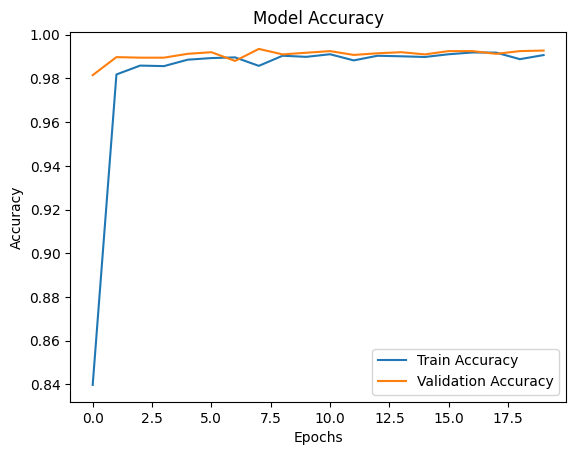

125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.9905 - loss: 0.0132
✅ Test Accuracy: 99.27%


In [18]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.show()

# Final evaluation
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {test_acc:.2%}")


In [19]:
model.save("gesture_model.h5")  # Save model
# To reload later:
# model = tf.keras.models.load_model("gesture_model.h5")
